In [17]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from time import time
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import scipy.spatial.distance as ssd
from datetime import datetime
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
np.random.seed(1234)
import random

<Figure size 640x480 with 0 Axes>

I have used the following site as reference.
https://medium.com/quaintitative/expected-shortfall-in-python-d049914e1e85

## Parameters

In [28]:
file_name="20_funds.csv"
start_default="2005-12-31"
num_funds=20
funds=['Fund_1', 'Fund_11', 'Fund_4', 'Fund_3', 'Fund_1', 'Fund_10']
initial_investment=200000
start_date="2005-12-31"
end_date="2021-08-31"
rolling_period=7
time_horizon=30
confidence_level=0.95
heirarchial_clustering=True
tot_funds=20
risk_free_rate=0.01
criterion=0 # selection criterion within a cluster, it can be "Random:0, Holding Period Return:1, Sharpe Ratio"2, Max Drawdown:3"

Selected Funds are:
['Fund_9', 'Fund_2', 'Fund_3', 'Fund_14', 'Fund_5', 'Fund_6', 'Fund_7', 'Fund_8', 'Fund_10', 'Fund_11', 'Fund_12', 'Fund_13', 'Fund_15', 'Fund_16', 'Fund_17', 'Fund_18', 'Fund_19', 'Fund_20']


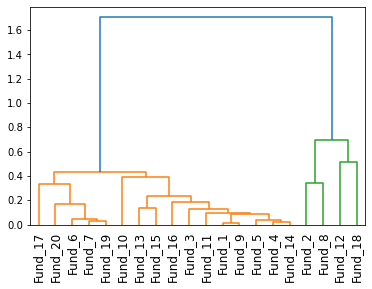

In [29]:
start=get_days_between(start_date,start_default) # getting index of date by finding the differnece start date and default start date
end=get_days_between(end_date,start_default)
df=pd.read_csv(file_name, names=get_cols_name(tot_funds))[1:]
if heirarchial_clustering==True:
    clusters=get_cluster(df,start,end,list(df.columns)[1:],rolling_period,time_horizon,num_funds,False)
    #print(clusters)
    funds=fund_selecttion(df,clusters,criterion,start,end,list(df.columns)[1:],rolling_period,time_horizon,num_funds,risk_free_rate)
print('Selected Funds are:')
print(funds)

Fund_9


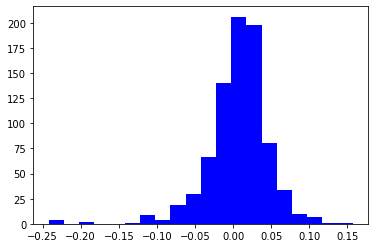

Fund_2


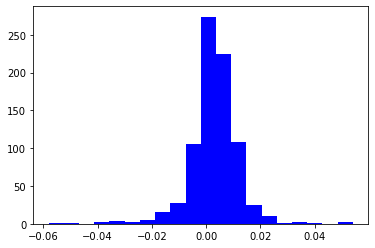

Fund_3


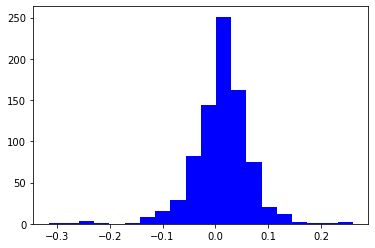

Fund_14


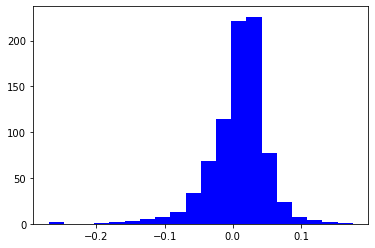

Fund_5


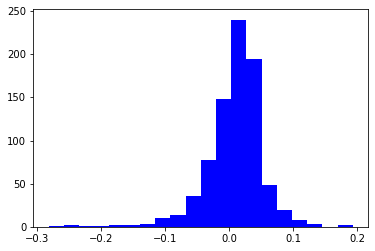

Fund_6


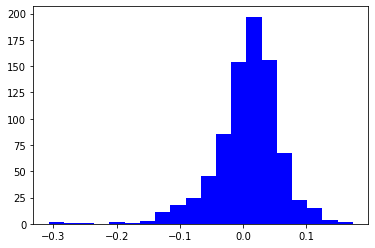

Fund_7


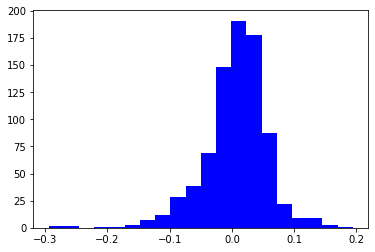

Fund_8


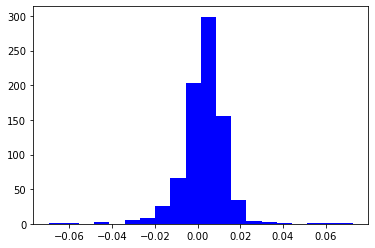

Fund_10


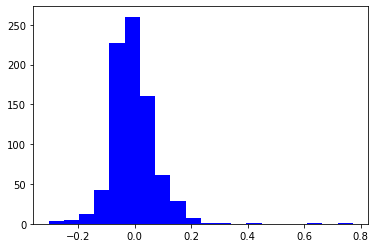

Fund_11


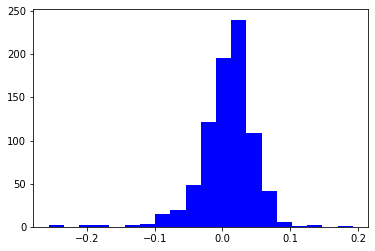

Fund_12


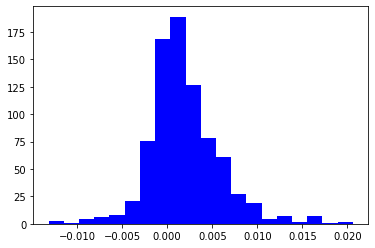

Fund_13


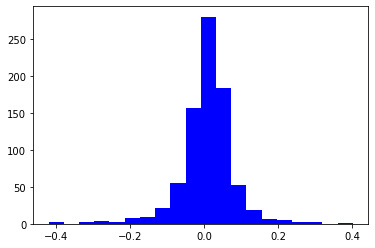

Fund_15


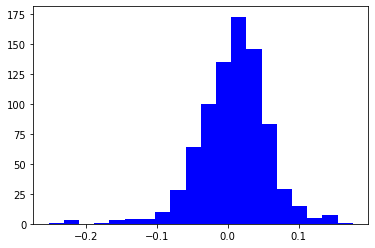

Fund_16


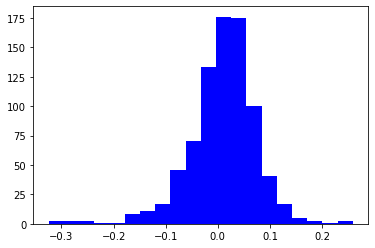

Fund_17


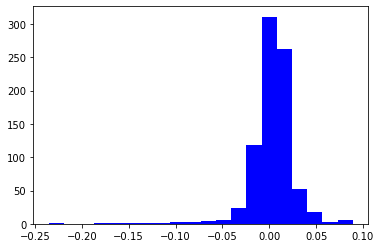

Fund_18


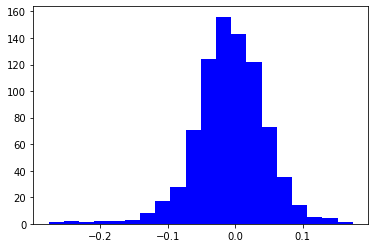

Fund_19


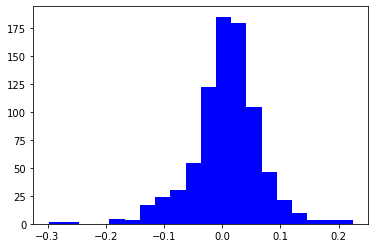

Fund_20


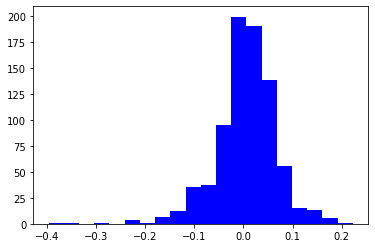

Investment in Portfolio


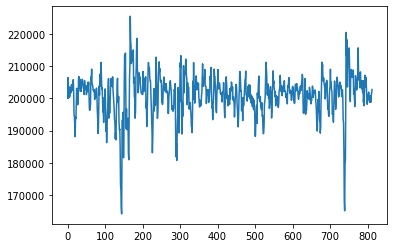

Initial Investment is 200000
Mean and Standard Deviation of Investment is  200990.49  6331.32
95.0 VaR is 9423.61  or 4.71 %
95.0 CVaR is 12069.21 or 6.03 %


In [30]:
var,cvar=calculate_var(initial_investment,df,start,end,funds,rolling_period,time_horizon,confidence_level,True)

In [27]:
var,cvar=calculate_var_MC(initial_investment,df,start,end,funds,rolling_period,time_horizon,confidence_level,30)

95.0 VaR via Monte Carlo is 1.01 %
95.0 CVaR via Monte Carlo is 2.77 %


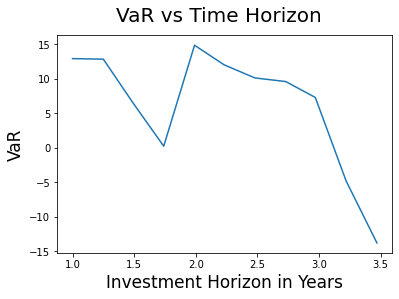

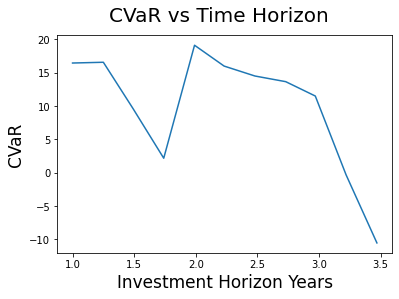

In [22]:
var_horizon={}
cvar_horizon={}
for horizon in range(365,int(365*3.5),90):
    params=pd.read_excel("CaseStudy.xlsx", skiprows=[0],index_col=[0],usecols=[0,1] )
    file_name=str(params.loc['File Name'].values[0])
    start_default=str(params.loc['Start Date Default'].values[0]).split(" ")[0]
    num_funds=int(params.loc['Number of Funds'].values[0])
    initial_investment=int(params.loc['Initial Investment'].values[0])
    start_date=str(params.loc['Start Date'].values[0]).split(" ")[0]
    end_date=str(params.loc['End Date'].values[0]).split(" ")[0]
    rolling_period=int(params.loc['Rolling Period'].values[0])
    time_horizon=horizon
    confidence_level=float(params.loc['Confidence Level'].values[0])
    tot_funds=int(params.loc['Total Funds'].values[0])
    risk_free_rate=float(params.loc['Risk Free Rate'].values[0])
    criterion=int(params.loc['Seletion Criterion'].values[0]) # selection criterion within a cluster, it can be "Random:0, Holding Period Return:1, Sharpe Ratio"2, Max Drawdown:3"
    start=get_days_between(start_date,start_default) # getting index of date by finding the differnece start date and default start date
    end=get_days_between(end_date,start_default)
    df=pd.read_csv(file_name, names=get_cols_name(tot_funds))[1:]
    clusters=get_cluster(df,start,end,list(df.columns)[1:],rolling_period,time_horizon,num_funds,True)
    #print(clusters)
    funds=fund_selecttion(df,clusters,criterion,start,end,list(df.columns)[1:],rolling_period,time_horizon,num_funds,risk_free_rate)
#     print('Selected Funds are:')
#     print(funds)
    var_horizon[round(horizon/365,2)],cvar_horizon[round(horizon/365,2)]=calculate_var(initial_investment,df,start,end,funds,rolling_period,time_horizon,confidence_level,False)
    
lists = sorted(var_horizon.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
fig = plt.figure()
plt.plot(x, y)
fig.suptitle('VaR vs Time Horizon', fontsize=20)
plt.xlabel('Investment Horizon in Years', fontsize=17)
plt.ylabel('VaR', fontsize=17)
plt.show()

lists = sorted(cvar_horizon.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
fig = plt.figure()
plt.plot(x, y)
fig.suptitle('CVaR vs Time Horizon', fontsize=20)
plt.xlabel('Investment Horizon Years', fontsize=17)
plt.ylabel('CVaR', fontsize=17)
plt.show()

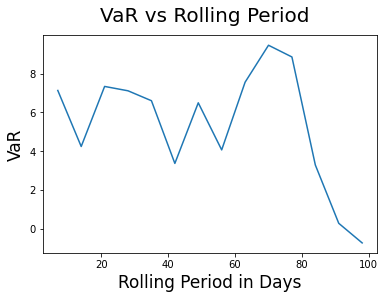

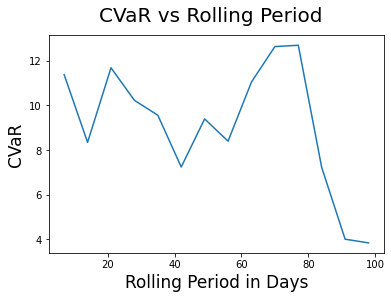

In [23]:
var_horizon={}
cvar_horizon={}
for rolling in range(7,100,7):
    params=pd.read_excel("CaseStudy.xlsx", skiprows=[0],index_col=[0],usecols=[0,1] )
    file_name=str(params.loc['File Name'].values[0])
    start_default=str(params.loc['Start Date Default'].values[0]).split(" ")[0]
    num_funds=int(params.loc['Number of Funds'].values[0])
    initial_investment=int(params.loc['Initial Investment'].values[0])
    start_date=str(params.loc['Start Date'].values[0]).split(" ")[0]
    end_date=str(params.loc['End Date'].values[0]).split(" ")[0]
    rolling_period=rolling
    time_horizon=int(params.loc['Time Horizon'].values[0])
    confidence_level=float(params.loc['Confidence Level'].values[0])
    tot_funds=int(params.loc['Total Funds'].values[0])
    risk_free_rate=float(params.loc['Risk Free Rate'].values[0])
    criterion=int(params.loc['Seletion Criterion'].values[0]) # selection criterion within a cluster, it can be "Random:0, Holding Period Return:1, Sharpe Ratio"2, Max Drawdown:3"
    start=get_days_between(start_date,start_default) # getting index of date by finding the differnece start date and default start date
    end=get_days_between(end_date,start_default)
    df=pd.read_csv(file_name, names=get_cols_name(tot_funds))[1:]
    clusters=get_cluster(df,start,end,list(df.columns)[1:],rolling_period,time_horizon,num_funds,True)
    #print(clusters)
    funds=fund_selecttion(df,clusters,criterion,start,end,list(df.columns)[1:],rolling_period,time_horizon,num_funds,risk_free_rate)
#     print('Selected Funds are:')
#     print(funds)
    var_horizon[rolling],cvar_horizon[rolling]=calculate_var(initial_investment,df,start,end,funds,rolling_period,time_horizon,confidence_level,False)
    
lists = sorted(var_horizon.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
fig = plt.figure()
plt.plot(x, y)
fig.suptitle('VaR vs Rolling Period', fontsize=20)
plt.xlabel('Rolling Period in Days', fontsize=17)
plt.ylabel('VaR', fontsize=17)
plt.show()

lists = sorted(cvar_horizon.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
fig = plt.figure()
plt.plot(x, y)
fig.suptitle('CVaR vs Rolling Period', fontsize=20)
plt.xlabel('Rolling Period in Days', fontsize=17)
plt.ylabel('CVaR', fontsize=17)
plt.show()

## Helper Functions

In [1]:
def rolling_time_series(data,time_horizon,rolling_period): # Generating the historical distribution of returns
    return_series=[]
    for i in range(time_horizon+1,len(data)-rolling_period-1,rolling_period):
        ret= ( float(data[i])-float(data[i-time_horizon]) )/ float(data[i-time_horizon])
        return_series.append(ret)
    return return_series

In [2]:
def get_cols_name(tot_funds): # Generating column names for the data frame
    cols_name=["Time"]
    for itr in range(1,tot_funds+1):
        temp="Fund_"+str(itr)
        cols_name.append(temp)
    return cols_name

In [3]:
def get_days_between(d1, d2): # finding total number of days for analysis
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [4]:
def transform_data(df,start_date,end_date,fund_names,rolling_period,time_horizon): # Tranforming the price date to returns format using rolling_time_series function
    df_new=pd.DataFrame()
    #print("transform_data start")
    for i in fund_names:
        df_new[i]=rolling_time_series(list(df[i][start_date:end_date]),time_horizon,rolling_period)
    #print("transform_data end")
    return df_new

In [5]:
def get_key(my_dict,val):
    for key, value in my_dict.items():
        if val == value:
            return key

#### Drawdown function

In [6]:
def get_maxDD(prices):
    max_dd=0
    peak=prices[0]
    trough=prices[0]
    n=len(prices)
    i=1
    while i<n:
        if prices[i]>trough:
            while i<n-1 and prices[i]>prices[i-1]:
                i+=1
            peak=prices[i]
            max_dd=max(max_dd,(peak-trough)/trough)
            i+=1
        elif prices[i]<peak:
            while i<n-1 and prices[i]<prices[i-1]:
                i+=1
            trough=prices[i]
            max_dd=max(max_dd,(peak-trough)/peak)
            i+=1
        else:
            i+=1
    return max_dd

## VaR, CVaR Calculation via Monte Carlo

In [7]:
def generate_sim(data): # Generating CDF for the time series for a fund
    sorted_data=sorted(data)
    n=len(data)
    weight=np.arange(1,n+1)/n
    cdf=pd.DataFrame({'value': sorted_data, 'wght':weight })
    #print(cdf)
    return cdf

def sample_cdf(cdf,n): # Sampling from CDF generated above
    u=np.random.uniform(0,1,n)
    ret=[]
    for i in range(n):
        indx=np.argmax(cdf['wght']>=u[i])
        ret.append(cdf['value'].iloc[indx])
    return ret

In [8]:
def calculate_var_MC(initial_investment,df,start_date,end_date,funds,rolling_period,time_horizon,confidence_level,n_sims):
    VaR_arr=[]
    CVaR_arr=[]
    for _ in range(n_sims):
        df_new=transform_data(df,start_date,end_date,funds,rolling_period,time_horizon)
        weights=np.array([1/len(funds) for _ in range(len(funds))])
        df_sim=pd.DataFrame()
        for i in funds:
            df_sim[i]=sample_cdf(generate_sim(df_new[i]),len(df_new))
        weights=np.array([1/len(funds) for _ in range(len(funds))])
        cov_matrix = df_sim.cov()
        avg_ret=df_sim.mean()
        investment_per_fund=initial_investment/len(funds)
        df_investment=pd.DataFrame()
        for fund in funds:
            df_investment[fund] = df_sim[fund].apply(lambda x: (1+x)*investment_per_fund)
        df_investment.loc[-1]=[investment_per_fund for _ in range(len(funds))]
        df_investment.index=df_investment.index+1
        df_investment.sort_index(inplace=True) 
        df_investment['Total'] = df_investment[list(df_investment.columns)].sum(axis=1)
        mean_investment = (1+avg_ret.dot(weights)) * initial_investment
        stdev_investment = initial_investment * np.sqrt(weights.T.dot(cov_matrix).dot(weights))
        CVaR_n = (1-confidence_level)**-1 * norm.pdf(norm.ppf((1-confidence_level)))*stdev_investment - mean_investment
        VaR_n = norm.ppf(confidence_level)*stdev_investment - mean_investment
        VaR= initial_investment + VaR_n
        CVaR= initial_investment + CVaR_n
        VaR_arr.append(VaR*100/initial_investment)
        CVaR_arr.append(CVaR*100/initial_investment)
    
    print(str(confidence_level*100) + " VaR via Monte Carlo is " + str(round(sum(VaR_arr)/len(VaR_arr),2))  + " %")
    print(str(confidence_level*100) + " CVaR via Monte Carlo is " + str(round(sum(CVaR_arr)/len(CVaR_arr),2)) + " %")
    return sum(VaR_arr)/len(VaR_arr), sum(CVaR_arr)/len(CVaR_arr)


## VaR, CVaR Empirical Calculation

In [9]:
def calculate_var(initial_investment,df,start_date,end_date,funds,rolling_period,time_horizon,confidence_level,flag):
    df_new=transform_data(df,start_date,end_date,funds,rolling_period,time_horizon)
    weights=np.array([1/len(funds) for _ in range(len(funds))]) # Equally weighted
    cov_matrix = df_new.cov()
    avg_ret=df_new.mean()
    if flag==True: # Plotting returns bar graph for context
        for fund in funds:
            print(str(fund))
            plt.hist(df_new[fund],color="blue",bins=20)
            plt.show()
    investment_per_fund=initial_investment/len(funds)
    df_investment=pd.DataFrame()
    for fund in funds:
        df_investment[fund] = df_new[fund].apply(lambda x: (1+x)*investment_per_fund)
    df_investment.loc[-1]=[investment_per_fund for _ in range(len(funds))]
    df_investment.index=df_investment.index+1
    df_investment.sort_index(inplace=True) 
    df_investment['Total'] = df_investment[list(df_investment.columns)].sum(axis=1)
    if flag==True: # Plotting investment in funds over the given time period
        print("Investment in Portfolio")
        plt.plot(df_investment['Total'])
        plt.show()
    mean_investment = (1+avg_ret.dot(weights)) * initial_investment
    stdev_investment = initial_investment * np.sqrt(weights.T.dot(cov_matrix).dot(weights))
    CVaR_n = (1-confidence_level)**-1 * norm.pdf(norm.ppf((1-confidence_level)))*stdev_investment - mean_investment
    VaR_n = norm.ppf(confidence_level)*stdev_investment - mean_investment
    VaR= initial_investment + VaR_n
    CVaR= initial_investment + CVaR_n
    if flag==True:
        print("Initial Investment is " + str(initial_investment))
        print("Mean and Standard Deviation of Investment is  " + str(round(mean_investment,2)) + "  " + str(round(stdev_investment,2)))
        print(str(confidence_level*100) + " VaR is " + str(round(VaR,2)) +  "  or " + str(round(VaR*100/initial_investment,2))  + " %")
        print(str(confidence_level*100) + " CVaR is " + str(round(CVaR,2)) +  " or " + str(round(CVaR*100/initial_investment,2)) + " %")
    return VaR*100/initial_investment, CVaR*100/initial_investment

## Clustering (Heirarchial Clustering)

In [10]:
def get_cluster(df,start_date,end_date,fund_names,rolling_period,time_horizon,num_funds,flag):
    df_new=transform_data(df,start_date,end_date,fund_names,rolling_period,time_horizon)
    corr = df_new.corr()  
    #distances = 1 - corr.abs().values  
    dist=pd.DataFrame(1-abs(corr),index=corr.index, columns=corr.columns)
    distArray = ssd.squareform(dist)  # Converts matrix to 1d array
    hier = hierarchy.linkage(distArray, method="ward")  
    dend = hierarchy.dendrogram(hier, truncate_mode="lastp",p=num_funds,leaf_rotation=90, labels=fund_names, no_plot=flag)
    #threshold = 1  # the criteion is to divide into number given clusters specified by the user
    cluster_labels = hierarchy.fcluster(hier, num_funds, criterion="maxclust")
    clusters={}
    #print(cluster_labels)
    for i in range(len(cluster_labels)):
        if cluster_labels[i] not in clusters:
            clusters[cluster_labels[i]]=["Fund_" + str(i+1)]
        else:
            clusters[cluster_labels[i]].append("Fund_" + str(i+1))
    return clusters

## Fund Selection

In [11]:
def get_fund(df,criterion,funds,start,end,rolling_period,time_horizon,risk_free_rate):
    df_new=transform_data(df,start,end,funds,rolling_period,time_horizon)
    stat={}
    risk_free_ret=risk_free_rate**(time_horizon/365)
    df=df.astype(float)
    stat["HPR"]={i :  (df.iloc[-1][i] -  df.iloc[0][i]) / (df.iloc[0][i]) for i in funds }
    stat["Sharpe"]={i : ( df_new[i].mean()-risk_free_ret)/(df_new[i].std())   for i in funds }
    stat["DD"]={i : get_maxDD(list(df[i]))   for i in funds }
    if criterion==1:
        #print(stat['HPR'])
        return get_key(stat['HPR'],max(stat['HPR'].values()))
    elif criterion==2:
        #print(stat['Sharpe'])
        return get_key(stat['Sharpe'],max(stat['Sharpe'].values()))
    elif criterion==3:
        #print(stat['DD'])
        return get_key(stat['DD'],max(stat['DD'].values()))
    elif criterion==4:
        if len(funds)==2:
            temp=random.randint(0, 1)
            return funds[temp]
        corr = df_new.corr()
        x=corr.sum(axis=1)
        y=x.index
        temp=min(x)
        for itr in range(len(x)):
            if x[itr]==temp:
                return y[itr]    
    else:
        temp=random.randint(0, len(funds)-1)
        return funds[temp]

In [12]:
def fund_selecttion(df,clusters,criterion,start,end,fund_names,rolling_period,time_horizon,num_funds,risk_free_rate):
    funds=[]
    for i in clusters:
        if len(clusters[i])==1:
            funds.append(clusters[i][0])
        else:
            if criterion==0:
                temp=random.randint(0, len(clusters[i])-1)
                funds.append(clusters[i][temp])
            else:
                funds.append(get_fund(df,criterion ,clusters[i],start,end,rolling_period,time_horizon,risk_free_rate))
    return funds